q1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
df= pd.read_csv('/content/drive/MyDrive/train.csv')

X = df['OverallQual']
y = df['SalePrice']

missing_X = X.isnull().sum()
missing_y = y.isnull().sum()
if missing_X > 0 or missing_y > 0:
  boul = X.notnull() & y.notnull()
  X = X[boul]
  y = y[boul]

In [4]:
class CustomLinearRegression:
    def __init__(self):
        self.slope = None
        self.intercept = None

    def fit(self, X, y):
        X = np.array(X).flatten()
        y = np.array(y).flatten()

        # Calculate means
        x_mean = np.mean(X)
        y_mean = np.mean(y)

        # Calculate slope using least squares formula
        numerator = np.sum((X - x_mean) * (y - y_mean))
        denominator = np.sum((X - x_mean) ** 2)

        self.slope = numerator / denominator
        self.intercept = y_mean - self.slope * x_mean

        return self

    def predict(self, X):
        X = np.array(X).flatten()
        return self.slope * X + self.intercept

In [5]:
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [6]:
def create_comparison_plots(X_train, y_train, X_test, y_test, custom_model, sklearn_model):
    custom_train_pred = custom_model.predict(X_train)
    custom_test_pred = custom_model.predict(X_test)
    sklearn_train_pred = sklearn_model.predict(X_train.values.reshape(-1, 1))
    sklearn_test_pred = sklearn_model.predict(X_test.values.reshape(-1, 1))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
    #p1
    ax1.scatter(X_train, y_train, alpha=0.6, color='lightblue',label='Training Data', s=30)
    ax1.plot(X_train, custom_train_pred, color='red', linewidth=2,label='Custom Linear Regression')
    ax1.plot(X_train, sklearn_train_pred, color='green', linewidth=2,linestyle='--', label='Sklearn Linear Regression')

    ax1.set_xlabel('Overall Quality', fontsize=12)
    ax1.set_ylabel('Sale Price', fontsize=12)
    ax1.set_title('Training Data: Custom vs Sklearn Linear Regression',fontsize=14, fontweight='bold')
    ax1.legend()
    ax1.grid(True)

    #p2
    ax2.scatter(X_test, y_test, alpha=0.6, color='lightcoral',label='Test Data', s=30)
    ax2.plot(X_test, custom_test_pred, color='red', linewidth=2,label='Custom Linear Regression')
    ax2.plot(X_test, sklearn_test_pred, color='green', linewidth=2,linestyle='--', label='Sklearn Linear Regression')

    ax2.set_xlabel('Overall Quality', fontsize=12)
    ax2.set_ylabel('Sale Price', fontsize=12)
    ax2.set_title('Test Data: Custom vs Sklearn Linear Regression',fontsize=14, fontweight='bold')
    ax2.legend()
    ax2.grid(True)

    plt.show()

custom train mse is  1991932329.939219
sklearn train mse is  1991932329.939219
custom test mse is  3920560868.2881427
sklearn test mse is  3920560868.2881427


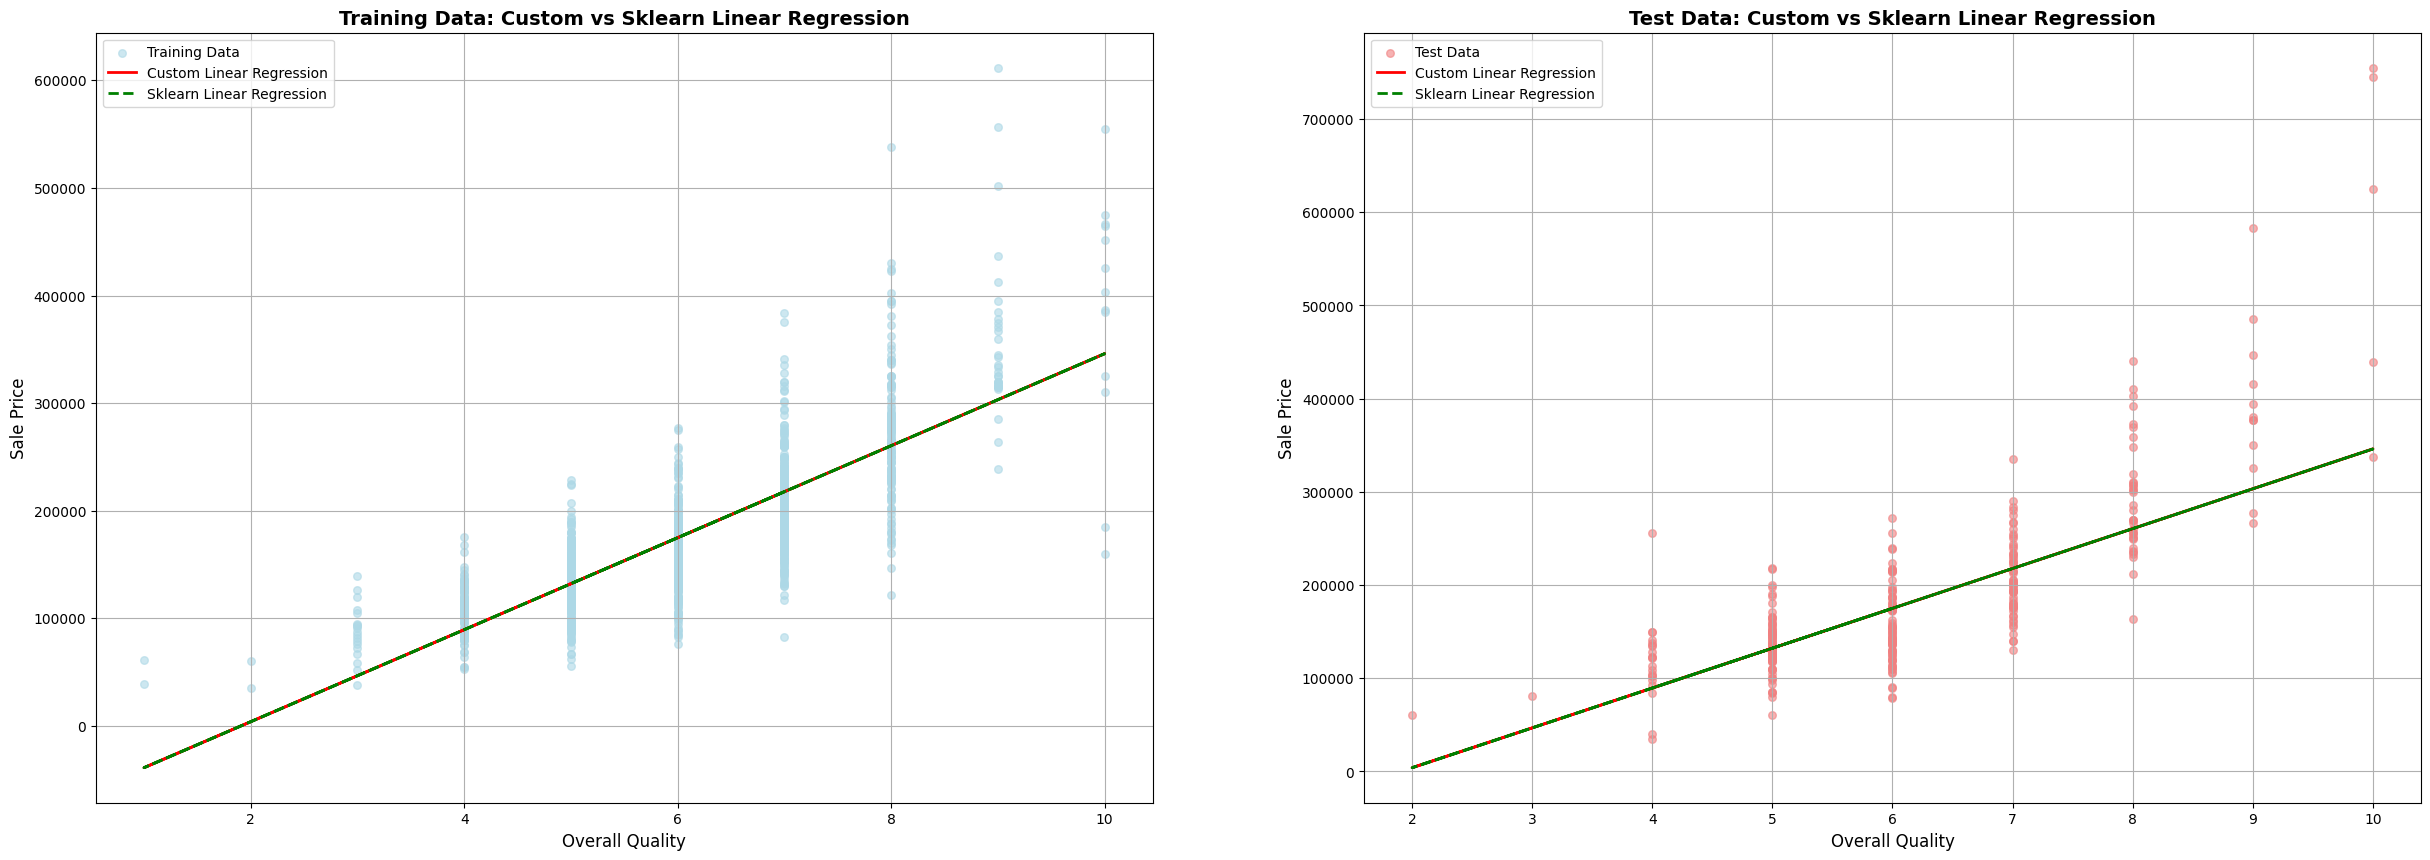

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
custom_model = CustomLinearRegression()
custom_model.fit(X_train, y_train)

# sklearn
sklearn_model = LinearRegression()
sklearn_model.fit(X_train.values.reshape(-1, 1), y_train)

# prediction
custom_train_pred = custom_model.predict(X_train)
custom_test_pred = custom_model.predict(X_test)

custom_train_mse = calculate_mse(y_train, custom_train_pred)
custom_test_mse = calculate_mse(y_test, custom_test_pred)

sklearn_train_pred = sklearn_model.predict(X_train.values.reshape(-1, 1))
sklearn_test_pred = sklearn_model.predict(X_test.values.reshape(-1, 1))

sklearn_train_mse = mean_squared_error(y_train, sklearn_train_pred)
sklearn_test_mse = mean_squared_error(y_test, sklearn_test_pred)

print('custom train mse is ' ,custom_train_mse)
print('sklearn train mse is ' ,sklearn_train_mse)
print('custom test mse is ' ,custom_test_mse)
print('sklearn test mse is ' ,sklearn_test_mse)

# plots
create_comparison_plots(X_train, y_train, X_test, y_test, custom_model, sklearn_model)



q2

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [49]:
df = pd.read_csv('/content/drive/MyDrive/StudentsPerformance.csv')

df['PassedMath'] = (df['math score'] >= 50).astype(int)
X = df[['reading score']].values
y = df['PassedMath'].values
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,PassedMath
0,female,group B,bachelor's degree,standard,none,72,72,74,1
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0
4,male,group C,some college,standard,none,76,78,75,1
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,1
996,male,group C,high school,free/reduced,none,62,55,55,1
997,female,group C,high school,free/reduced,completed,59,71,65,1
998,female,group D,some college,standard,completed,68,78,77,1


In [50]:
class CustomLogisticRegression:
    def __init__(self, learning_rate=0.01, max_iterations=1000):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.max_iterations):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_probabilities(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_pred)

    def predict(self, X):
        probabilities = self.predict_probabilities(X)
        return (probabilities >= 0.5).astype(int)

In [51]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{model_name}:")
    print(f"Accuracy:  {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall:    {recall}")
    print(f"F1-Score:  {f1}")

    return accuracy, precision, recall, f1


Custom Logistic Regression:
Accuracy:  0.875
Precision: 0.875
Recall:    1.0
F1-Score:  0.9333333333333333

Sklearn Logistic Regression:
Accuracy:  0.91
Precision: 0.9289617486338798
Recall:    0.9714285714285714
F1-Score:  0.9497206703910615


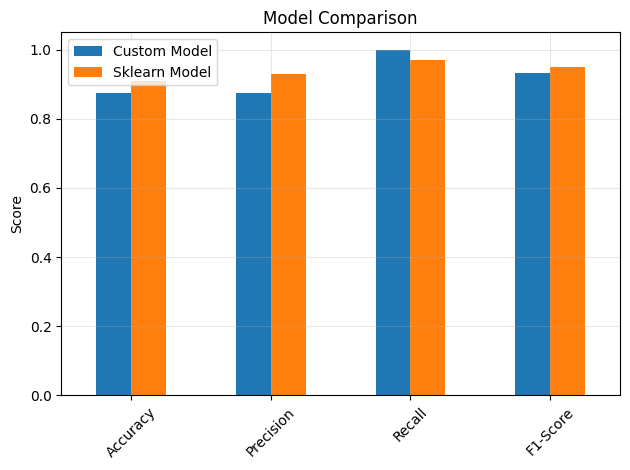

Confusion Matrices:
Custom Model
[[  0  25]
 [  0 175]]
Sklearn Model
[[ 12  13]
 [  5 170]]


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# logistic regression
custom_model = CustomLogisticRegression(learning_rate=0.01, max_iterations=1000)
custom_model.fit(X_train, y_train)
custom_pred_probabilities = custom_model.predict_probabilities(X_test)
custom_pred = custom_model.predict(X_test)
custom_metrics = evaluate_model(y_test, custom_pred, "Custom Logistic Regression")

# sklearn model
sklearn_model = LogisticRegression(random_state=42, max_iter=1000)
sklearn_model.fit(X_train, y_train)
sklearn_pred_proba = sklearn_model.predict_proba(X_test)[:, 1]
sklearn_pred = sklearn_model.predict(X_test)
sklearn_metrics = evaluate_model(y_test, sklearn_pred, "Sklearn Logistic Regression")

# comparison
metrics_df = pd.DataFrame({'Custom Model': custom_metrics,'Sklearn Model': sklearn_metrics}, index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
plt.subplot(1, 1, 1)
metrics_df.plot(kind='bar', ax=plt.gca())
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print("Confusion Matrices:")
print("Custom Model")
print(confusion_matrix(y_test, custom_pred))
print("Sklearn Model")
print(confusion_matrix(y_test, sklearn_pred))